In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:

from IPython.display import display
# Summary statistics for loaded curves (separate tables for Bezier and PolyChain)
models = [
    ('RN8', RN8_bz, RN8_pc),
    ('RN26', RN26_bz, RN26_pc),
    ('RN38', RN38_bz, RN38_pc),
    ('RN65', RN65_bz, RN65_pc),
]
rows_bez = []
rows_poly = []
for name, bz, pc in models:
    # Bezier
    try:
        bz_acc = bz['te_acc']
        rows_bez.append({
            'model': name,
            'mean': float(np.mean(bz_acc)),
            'min': float(np.min(bz_acc)),
            'max': float(np.max(bz_acc)),
        })
    except Exception as e:
        rows_bez.append({'model': name, 'error': str(e)})
    # PolyChain
    try:
        pc_acc = pc['te_acc']
        rows_poly.append({
            'model': name,
            'mean': float(np.mean(pc_acc)),
            'min': float(np.min(pc_acc)),
            'max': float(np.max(pc_acc)),
        })
    except Exception as e:
        rows_poly.append({'model': name, 'error': str(e)})

df_bez = pd.DataFrame(rows_bez).set_index('model')
df_poly = pd.DataFrame(rows_poly).set_index('model')
# Format numeric columns to two decimals with percent sign for display
for df in (df_bez, df_poly):
    for col in ['mean','min','max']:
        if col in df.columns:
            df[col] = df[col].apply(lambda x: f"{x:.2f}%" if isinstance(x, (int, float, np.floating)) and not pd.isna(x) else x)

print('Bezier summary:')
display(df_bez)
print('\nPolyChain summary:')
display(df_poly)

# keep dfs available for further processing
#df_bez, df_poly

Bezier summary:


,mean,min,max
model,,,
RN8,85.55%,83.72%,87.71%
RN26,91.56%,90.57%,92.57%
RN38,92.20%,91.37%,93.18%
RN65,93.02%,92.37%,93.99%



PolyChain summary:


,mean,min,max
model,,,
RN8,85.27%,83.51%,87.62%
RN26,91.36%,89.93%,92.47%
RN38,92.15%,91.21%,93.11%
RN65,92.89%,92.20%,93.90%


In [22]:
# Compute AUC (area above endpoint max) and peak height for test accuracy
rows_bez_auc = []
rows_poly_auc = []
for name, bz, pc in models:
    # Bezier
    try:
        ts = bz['ts']
        te_acc = bz['te_acc']
        te_max = max(float(te_acc[0]), float(te_acc[-1]))
        auc = float(np.max(te_acc) -np.trapezoid((te_acc), ts))
        peak = float(np.max(te_acc) - np.min(te_acc))
        rows_bez_auc.append({'model': name, 'auc': auc, 'peak_height': peak})
    except Exception as e:
        rows_bez_auc.append({'model': name, 'error': str(e)})
    # PolyChain
    try:
        ts = pc['ts']
        te_acc = pc['te_acc']
        te_max = max(float(te_acc[0]), float(te_acc[-1]))
        auc = float(np.max(te_acc) -np.trapezoid((te_acc), ts))
        peak = float(np.max(te_acc) - np.min(te_acc))
        rows_poly_auc.append({'model': name, 'auc': auc, 'peak_height': peak})
    except Exception as e:
        rows_poly_auc.append({'model': name, 'error': str(e)})

df_bez_auc = pd.DataFrame(rows_bez_auc).set_index('model')
df_poly_auc = pd.DataFrame(rows_poly_auc).set_index('model')
# Add formatted display columns
for df in (df_bez_auc, df_poly_auc):
    if 'auc' in df.columns:
        df['AUC_display'] = df['auc'].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float, np.floating)) and not pd.isna(x) else x)
    if 'peak_height' in df.columns:
        df['PeakHeight_display'] = df['peak_height'].apply(lambda x: f"{x:.2f}%" if isinstance(x, (int, float, np.floating)) and not pd.isna(x) else x)

print('Bezier AUC / Peak Height:')
display(df_bez_auc[[c for c in df_bez_auc.columns if 'display' in c]])
print('\nPolyChain AUC / Peak Height:')
display(df_poly_auc[[c for c in df_poly_auc.columns if 'display' in c]])

# keep dfs available for further processing
#df_bez_auc, df_poly_auc

Bezier AUC / Peak Height:


,AUC_display,PeakHeight_display
model,,
RN8,2.1959,3.99%
RN26,1.0238,2.00%
RN38,0.9978,1.81%
RN65,0.9788,1.62%



PolyChain AUC / Peak Height:


,AUC_display,PeakHeight_display
model,,
RN8,2.3770,4.11%
RN26,1.1292,2.54%
RN38,0.9705,1.90%
RN65,1.0170,1.70%


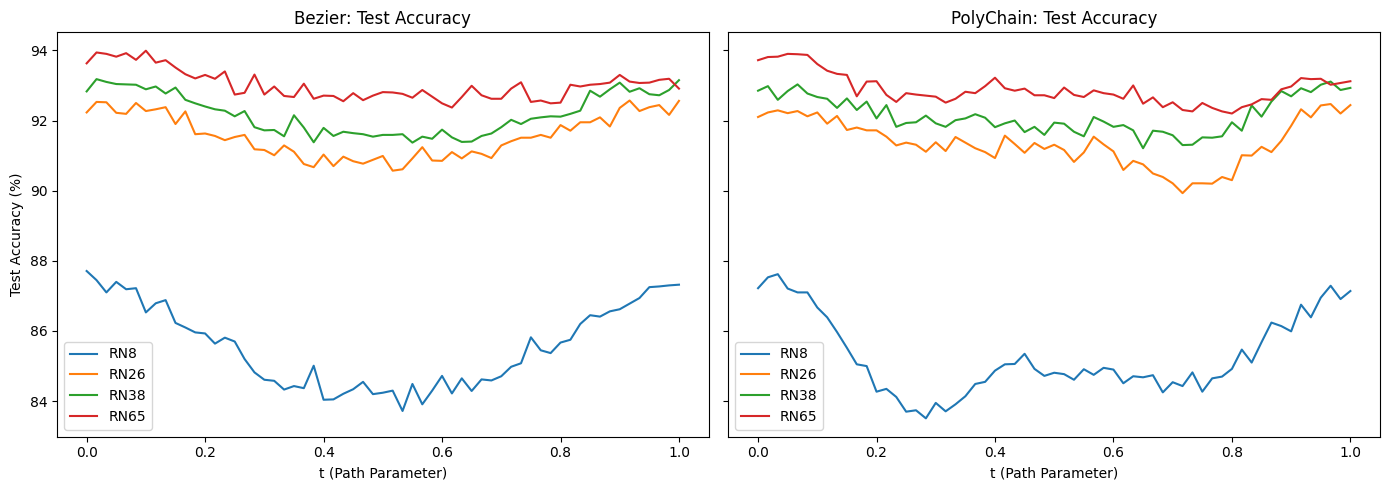

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(14,5), sharey=True)
models = [
    ('RN8', RN8_bz, RN8_pc),
    ('RN26', RN26_bz, RN26_pc),
    ('RN38', RN38_bz, RN38_pc),
    ('RN65', RN65_bz, RN65_pc),
]
# Left: Bezier curves for all models
for name, bz, pc in models:
    try:
        ts = bz['ts']
        te_acc = bz['te_acc']
        axs[0].plot(ts, te_acc, label=name)
    except Exception:
        pass
axs[0].set_xlabel('t (Path Parameter)')
axs[0].set_ylabel('Test Accuracy (%)')
axs[0].set_title('Bezier: Test Accuracy')
axs[0].legend()
# Right: PolyChain curves for all models
for name, bz, pc in models:
    try:
        ts = pc['ts']
        te_acc = pc['te_acc']
        axs[1].plot(ts, te_acc, label=name)
    except Exception:
        pass
axs[1].set_xlabel('t (Path Parameter)')
axs[1].set_title('PolyChain: Test Accuracy')
axs[1].legend()
plt.tight_layout()
plt.show()